# Analysis of Ames Housing dataset in the years 2006 to 2010 
## INTRODUCTION
In the real estate market, many factors influence the pricing of houses. This includes the sizes of different rooms, Geographical location of the houses, quality and the timeline between  the date of construction and the date of sale. There is usually a fine line between the real estate owner  making profits, and making the houses markettable while mantaining a good customer relation. I have provided a detailed analysis for Ames Housing Estate as from the year 2006 to the year 2010, which will avail factors influencing home sales and pricing.

For a non-complex presentation of the data, click the [link](https://docs.google.com/presentation/d/1gWZnmrfh8FiU5tST-7Jt5mqwrHi5X5AtCKWHckTpKdA/edit?usp=sharing)

## Objectives
1. To explore the data, understand it and ensure it's clean.
2. To Visualize our data, and perform summarry statistics with interpretations.
3. To create subsets and explore differences between them
4. To perform correlation analysis and explain their impact on the data.
5. To examine other specific features that influence our data.
 
 



### 1. Data  Understanding, exploration  and cleaning

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale.
Our data consists of 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

In [411]:
#Lets import essential libraries that we will be using in our analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [413]:
# Now lets import our data to the notebook. The data is saved in the data folder; 
with open('data/data_description.txt', 'r') as f:
    data = f.readlines()
#data
df = pd.read_csv('data/ames.csv', index_col = 0)
#Inspect the contents of the dataframe:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


- Remove duplicates.
We do not  want our dataset to have repetitive data, as this might affect the results


In [465]:
#We're counting how many duplicates are in our data
df.duplicated().sum()


0

- We noticed our data does not have duplicates, so we are good to go!

In [417]:
# Lets get to know our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2.  Visualize our data and perform summary statistics 

We shall be displaying histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.



### a. Sale Price

In the cell below, we shall produce a histogram for `SalePrice`.

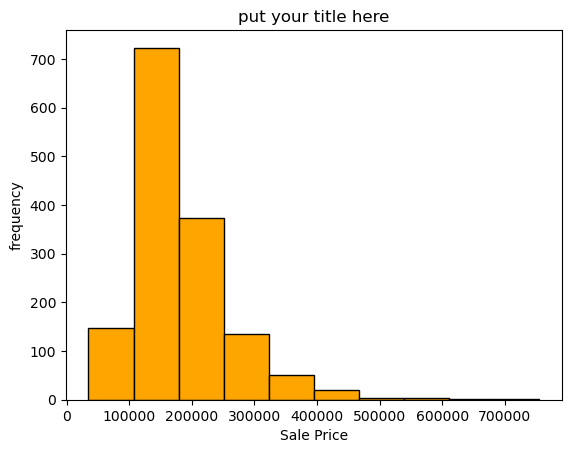

In [420]:
# Now let's represent the data visually using a bar chart
plt.hist(x=df['SalePrice'], edgecolor='black', color='orange')
plt.title('put your title here')
plt.xlabel('Sale Price')
plt.ylabel('frequency')
plt.show()

Now, let us print out the mean, median, and standard deviation for the sale prices:

In [422]:
#mean
mean_saleprice = round(df['SalePrice'].mean(),4)
#median
median_saleprice = round(df['SalePrice'].median(),4)
#mode
mode_saleprice = round(df['SalePrice'].mode()[0],4)
#standard deviation
std_saleprice = round(df['SalePrice'].std(),4)
print(f'The mean saleprice of the houses is {mean_saleprice}')
print(f'The median saleprice of the houses is {median_saleprice}')
print(f'The mode saleprice of the houses is {mode_saleprice}')
print(f'The standard deviation of saleprice of the houses is {std_saleprice}')

The mean saleprice of the houses is 180921.1959
The median saleprice of the houses is 163000.0
The mode saleprice of the houses is 140000
The standard deviation of saleprice of the houses is 79442.5029


* From the above cell, we calculated the mean, median, mode and standard deviations for the saleprice, used the function `round()` to round off the values to 4 decimal places, then assigned these values to the variables `mean_saleprice`, `median_saleprice`, `mode_saleprice` and `std_saleprice` respectfully.

### b.Total Rooms Above Grade

In the cell below,we shall produce a histogram for `TotRmsAbvGrd`.

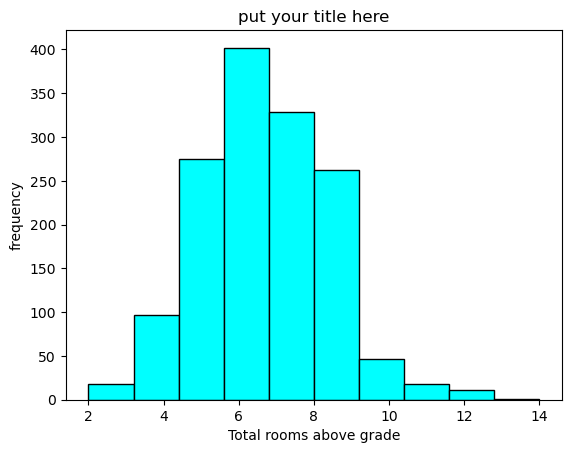

In [424]:

plt.hist(x=df['TotRmsAbvGrd'], edgecolor='black', color='cyan')
plt.title('put your title here')
plt.xlabel('Total rooms above grade')
plt.ylabel('frequency')
plt.show()

Now,lets print out the mean, median, and standard deviation:

In [426]:

#mean
mean_TotRmsAbvGrd = round(df['TotRmsAbvGrd'].mean(),4)
#median
median_TotRmsAbvGrd = round(df['TotRmsAbvGrd'].median(),4)
#mode
mode_TotRmsAbvGrd = round(df['TotRmsAbvGrd'].mode()[0],4)
#standard deviation
std_TotRmsAbvGrd = round(df['TotRmsAbvGrd'].std(),4)
print(f'The mean total rooms above grade of the houses is {mean_TotRmsAbvGrd}')
print(f'The median total rooms above grade of the houses is {median_TotRmsAbvGrd}')
print(f'The mode total rooms above grade of the houses is {mode_TotRmsAbvGrd}')
print(f'The standard deviation of Total rooms above grade of the houses is {std_TotRmsAbvGrd}')

The mean total rooms above grade of the houses is 6.5178
The median total rooms above grade of the houses is 6.0
The mode total rooms above grade of the houses is 6
The standard deviation of Total rooms above grade of the houses is 1.6254


* From the above cell, we calculated the mean, median, mode and standard deviations for total rooms above grade, used the function `round()` to round off the values to 4 decimal places, then assigned these values to the variables `mean_TotRmsAbvGrd`, `median_TotRmsAbvGrd`, `mode_TotRmsAbvGrd` and `std_TotRmsAbvGrd` respectfully.

### c. Overall Condition

In the cell below, we shall produce a histogram for `OverallCond`.

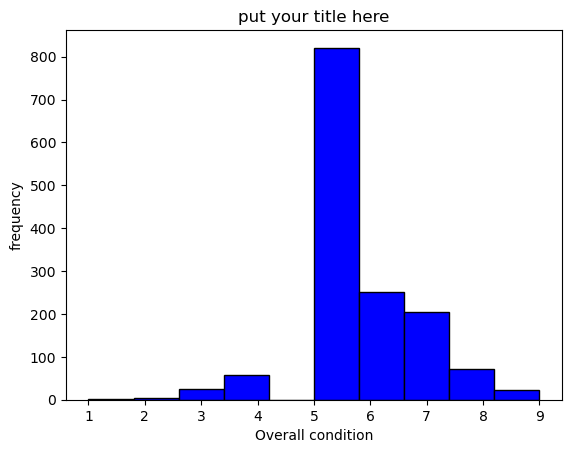

In [428]:

plt.hist(x=df['OverallCond'], edgecolor='black', color='blue')
plt.title('put your title here')
plt.xlabel('Overall condition')
plt.ylabel('frequency')
plt.show()

Now, the mean, median, and standard deviation:

In [430]:

#mean
mean_OverallCond = round(df['OverallCond'].mean(),4)
#median
median_OverallCond = round(df['OverallCond'].median(),4)
#mode
mode_OverallCond = round(df['OverallCond'].mode()[0],4)
#standard deviation
std_OverallCond = round(df['OverallCond'].std(),4)
print(f'The mean overall condition is {mean_OverallCond}')
print(f'The median overal condition is {median_OverallCond}')
print(f'The mode overall condition is {mode_OverallCond}')
print(f'The standard deviation for overall conditions is {std_OverallCond}')

The mean overall condition is 5.5753
The median overal condition is 5.0
The mode overall condition is 5
The standard deviation for overall conditions is 1.1128


* From the above cell, we calculated the mean, median, mode and standard deviations for total rooms above grade, used the function `round()` to round off the values to 4 decimal places, then assigned these values to the variables `mean_OverallCond`, `median_OverallCond`, `mode_OverallCond` and `std_OverallCond` respectfully.

## 3.  Create and Explore Differences between Subsets

Lets create different subsets and explore their differences:

The subsets shall be created as below:

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [432]:
# subset for homes with overall condition below average 
below_average_condition = df[df['OverallCond'] < 5]

# Subset for homes with average overall condition 
average_condition = df[df['OverallCond'] == 5]

# Subset for homes with overall condition above average
above_average_condition = df[df['OverallCond'] > 5]


The following code will produce a plot of the distributions of sale price for each of these subsets:

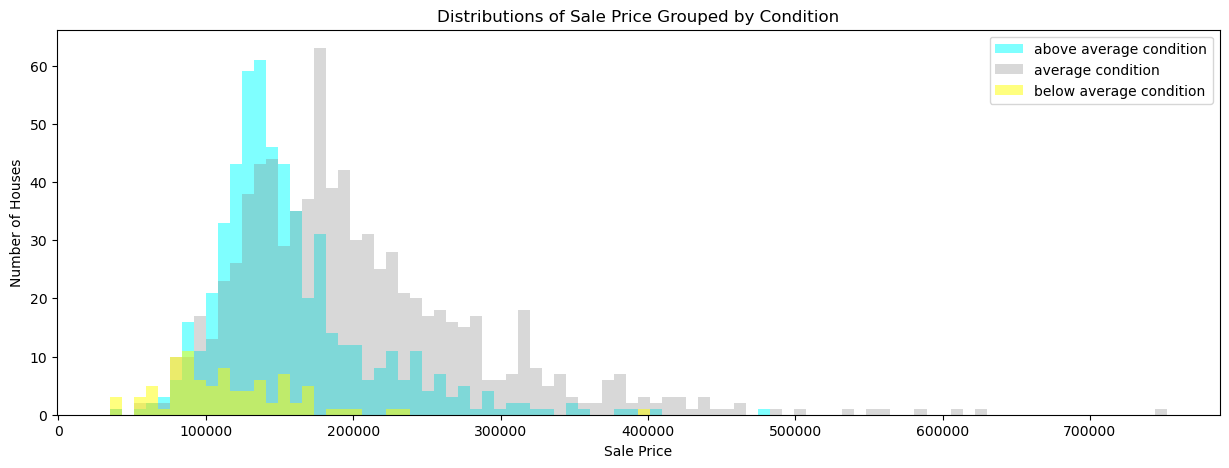

In [434]:

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

### Interpretation
**1. Above average condition** 

- This is represented by the cyan histogram above.
- It is clear that the histogram is skewed towards the right; so it is a negative skew.
- This means that Houses with better conditions (above average) are more likely to attract higher prices.
    
 **2. Average Condition** 

- This is represented by the gray histogram.
- The histogram has a symetrical disribution.
- This suggests that homes in average condition are spread across a wide range of prices, possibly due to varying sizes, locations, or features.
    
 **3. Below average condition**

- Represented by the yellow histogram.
- This is a positive skew.
- The homes in this category are in the lower price range, since they are less likely to attract higher prices due to their relatively poor conditions.
    
 **Important note:**

- Outlier in below average condition
- besides the trend we have  witnessed that houses in below average condition attract fewer prices, there might be a rare case where presummably the house is strategically located thus increasing its demand which in return increases its value
        
**Conclussion:**

- The prices of homes and their quality is directly proportional, with higher quality homes attracting higher prices while lower quality homes attracting lower prices.
    
    

## 4. Perform correlation analysis and explain the impact on our data.

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, we will print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

In [438]:
#we are only working with columns with numeric data types only, so lets filter out:
numeric_columns = df.select_dtypes(include='number')


Lets find the most positively correlated column.

In [440]:

# Calculates the  correlation of every column in the DataFrame
correlation_ = numeric_columns.corr()
# lets find the correlations with the column SalePrice and sort them:
saleprice_corr = correlation_['SalePrice'].drop('SalePrice')
# .drop drops SalePrice itself (it is perfectly correlated to itself)
#  get the column with the maximum positive correlation
max_corr_column = saleprice_corr.idxmax()
#returns the correlation value 
max_corr_value = saleprice_corr.max()
print(f"The column most positively correlated with SalePrice is {max_corr_column} with a correlation of {round(max_corr_value,2)}")

The column most positively correlated with SalePrice is OverallQual with a correlation of 0.79


Now, lets find the ***most negatively correlated*** column:

In [442]:

saleprice_corr = correlation_['SalePrice'].drop('SalePrice')
# .drop drops SalePrice itself (it is perfectly correlated to itself)
#  get the column with the minimum  correlation
min_corr_column = saleprice_corr.idxmin()
#returns the correlation value 
min_corr_value = saleprice_corr.min()
print(f"The column most negatively correlated with SalePrice is {min_corr_column} with a correlation of {round(min_corr_value,2)}")

The column most negatively correlated with SalePrice is KitchenAbvGr with a correlation of -0.14


Now we will produce a boxplot with the above data:

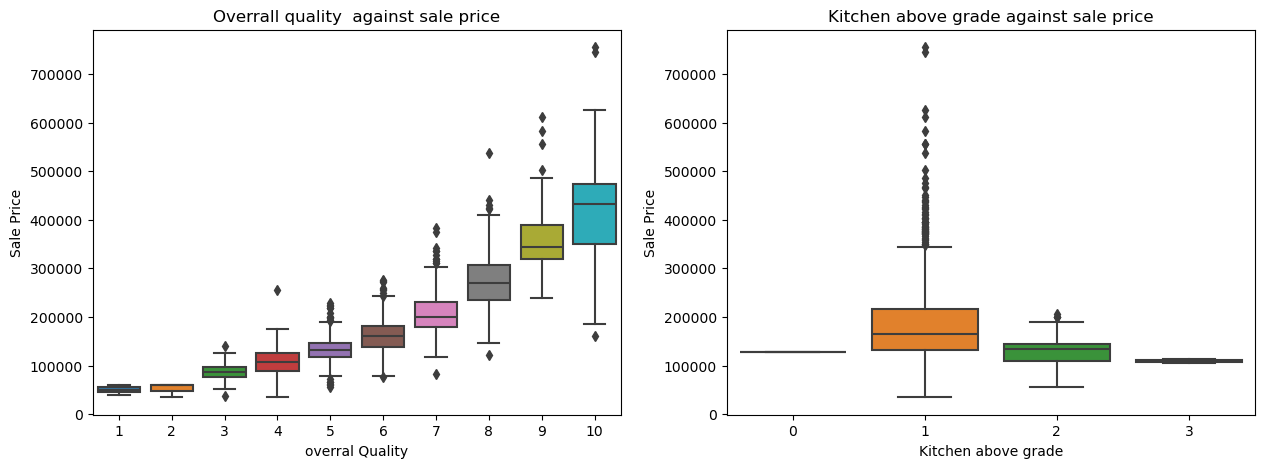

In [444]:

#Import the library that we are going to be using:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Overrall quality  against sale price')
ax1.set_xlabel('overral Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Kitchen above grade against sale price')
ax2.set_xlabel('Kitchen above grade')
ax2.set_ylabel("Sale Price");

In [446]:
#Lets call the data/data_description.txt file to see its components:
data

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

### Interpretation of the boxplots ###

**Overral condition against saleprice:** 
        
- As we can see in the boxplot to the left; Overral condition against sale price, there is a positive correlation,
- whereby the overall condition increases as the median of the sale prices also increases.
- Houses of higher quality are likely to have a relatively tight spread of data, 
 indicating that houses of this category have higher prices.
- Outliers, though visible, are fewer. This is because some houses are of much hier quality than the rest

**Kitchen above grade against saleprice** 
- As witnessed in the boxplot to the right; kitchen above grade against sale price, there is a negative - -correlation to sale prices.
- This is because as Kitchen above grade increases, the sale prices decrease.
- The negative correlation may be associated by the fact that not most potential buyers put the quality of the kitchen to concideration while buying these houses

## 5.  Explore other specific features

We note that the data spans across several years of sales:

In [449]:

df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

**Interpretation of the above code:**
- `df["YrSold"]` This code is to select the year sold column in the dataframe
- `.value_counts()` To count the occurance of each unique value in the column
- `.sort_index()` To sort the unique values by the index, in this case the year
- Basically this code helps us know the total houses sold each year
  

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a different feature; age!

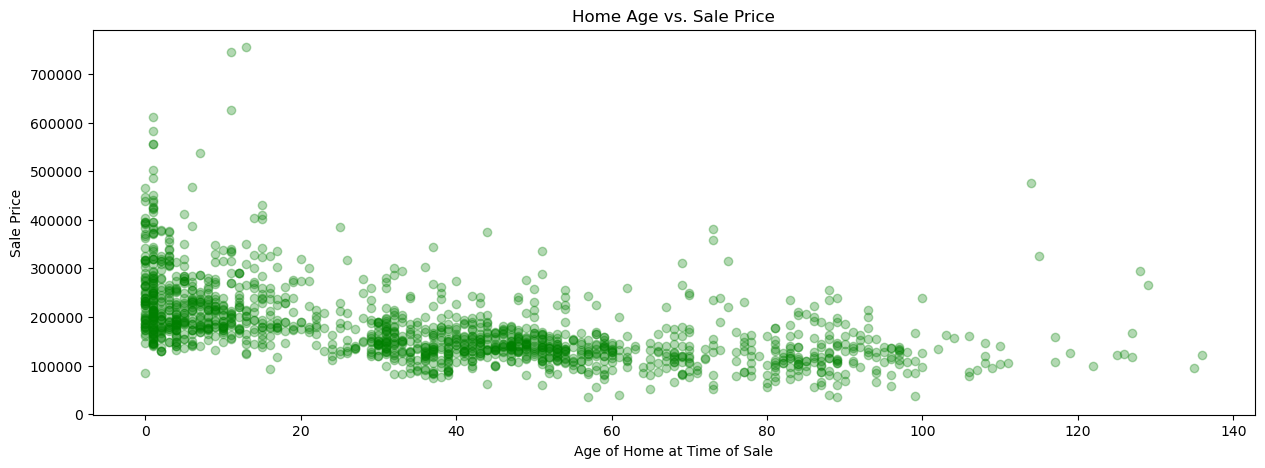

In [452]:

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

We started by creating a new column: `df["Age"]` which was calculated by getting the difference between the year of build; `df["YearBuilt"]` and the year of sale ; `df["YrSold"]`

### Interpretation for the above plot:
**What the plot represents:**
1. ***X-axis:***
   This represents how many years the house was ever since it was built to the time of sale
2. ***Y- axis:***
   This represents the price the house was sold at, in this case in dollars
- Each point represents a single house sale.
- We can see that the scatter points are nearer to the y-axis.
- This indicates that the newer houses had more sales, as these houses should be of better quality
- As the scatter point progresses towards the right, we might notice that there are still sales.
- These sales lie on the lower part of the plot, indicating that these houses were bought at a relatively lower price, thus attracted a number of customers.
- Higher sales are more concentrated on the far left, where houses are newer. Newer houses , possibly due to newer features, attract higher value.
- Outliers, however, are a concideration, as some older houses may have been peerfectly mantained by their owners, and thus mantained quality.

## Findings:

**Sale price and home condition:**

- There is a strong relationship between the condition of the house (OverallCond) and the sale price.
- Homes in better condition tend to have higher sale prices.
- Homes with a lower condition; below 5 tend to have significantly lower sale prices.

  
**Home age and sale price:**

- Newer homes generally have higher sale prices, but there are exceptions, pressumably for well-maintained or renovated older homes or homes  that are strategically positioned.
- Older homes have a wider range of prices, because buyers tend to be attracted to other features besides age and the price.

**Correlations:**

- Strong positive correlation was observed between the sale price and features like OverallQual (overall quality of the home) and the year built (YearBuilt).
- Negative correlations were seen between sale price and features such as Kitchen Above Grade.

**Sale price trends over time:**

- We can witness a decrease in sales, with sales dropping to 175 in 2010 as compared to 314 in 2006. This might be an indicator of the tough economic times causing affordability of houses to decrease over the Years.

 ## Recomendation
 I would suggest we take into concideration the following during future analysis:
 
- Concider other key factors such as the geographical location of the houses
- Implement other data measurements such as level of inflation
- Consult other home owners in the neighbourhood

## Conclussion
This analysis reveals that key areas such as the overall condition, and age influence the sales of property.We found that the condition and age of the home play significant roles in determining the sale price, but these are not the only factors to put in concideration. We have also discovered that over the years, sales have drastically decreased, relating this to the inflating economy.